# HACKATHON

In [197]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                    
import seaborn as sns                       
import pandas as pd                   
import numpy as np                          

In [198]:
data=pd.read_csv("data (1) (1).csv")      #read the data

In [199]:
data.head()             #display top 5 data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [200]:
data.columns           #all the columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [201]:
data.shape              #rows and columns of data

(10692, 13)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [203]:
data.isnull().sum()     #checking for null values

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [204]:
data.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


## LEVEL 1 ANALYSIS

We have to seperate the columns as continous or categorical data  
So for this we use nunique function  
We consider columns with more than 50 unique values as continous and others as categorical  

In [205]:
# Seprating out the categorical and continuous variables
def seprate_data_types(data):
    categorical = []
    continuous = []
    for column in data.columns:                # looping on the number of columns
        if data[column].nunique() < 50:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(data)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


# UNIVARIATE ANALYSIS

So we consider the categorical data first  
For categorical data we can find the mode  
As we dont have any null values we dont have to check for null values again  

In [206]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {data[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {data[col].mode()[0]}")  # mode: returns the mode of the column
    
      

## Column : City

In [207]:
info_of_cat("city")

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo


We have 5 cities  ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']  
The most occuring city is São Paulo


## Visual representation of cities

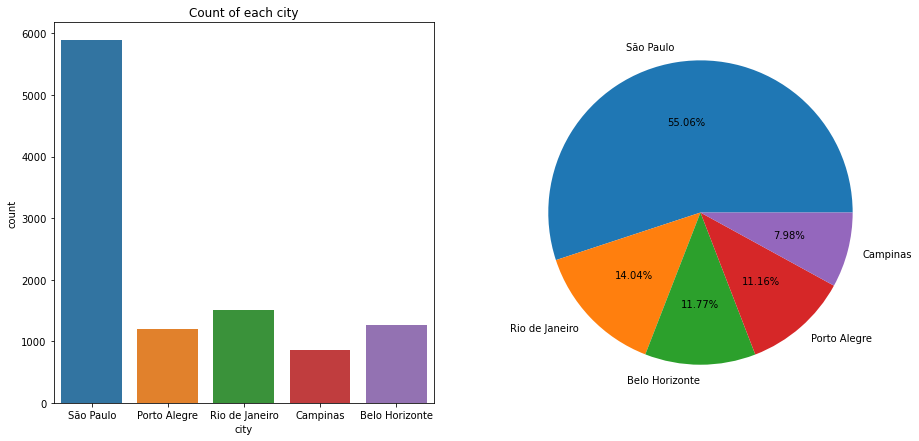

In [208]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of each city")                  # Set the title of the graph
percentage = data["city"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["city"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["city"], ax = ax[0])
plt.pie(percentage, labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# The above graphs indicate that most of houses are in Sao Paulo with more than 55%

## Column : Rooms

In [209]:
info_of_cat("rooms")

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3


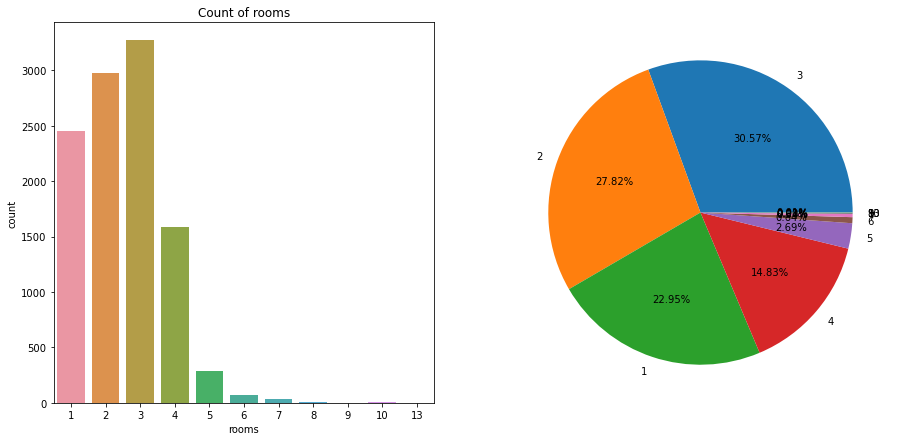

In [210]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of rooms")                  # Set the title of the graph
percentage = data["rooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["rooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["rooms"], ax = ax[0])
plt.pie(percentage, labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## From the above graps we can say that most of the houses have either 1,2 or 3 rooms which ad upto to almost 80%   

## Column : Bathroom

In [211]:
info_of_cat("bathroom")

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1


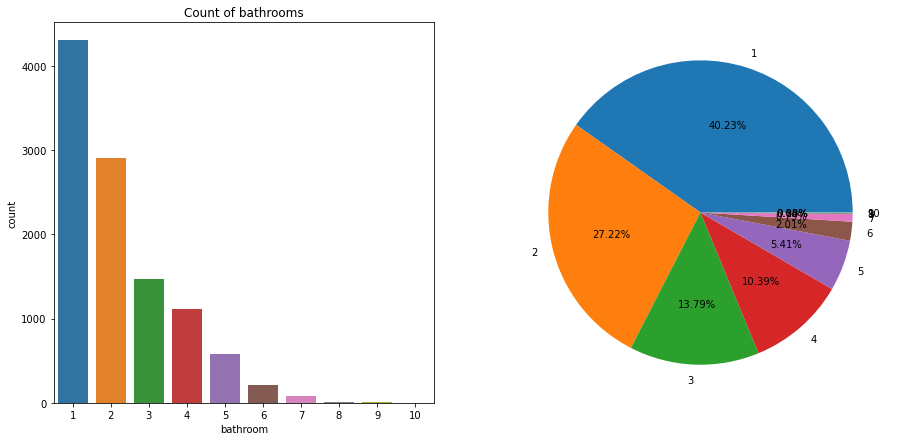

In [212]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of bathrooms")                  # Set the title of the graph
percentage = data["bathroom"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["bathroom"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["bathroom"], ax = ax[0])
plt.pie(percentage, labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## As very few houses have more than 5 bathrooms, we can say that having bathrooms more than 5 might be abnormal  
So we can clean the data.

In [213]:
# We are replacing the remaning data with the mean 
mean = int(data.bathroom.mean())
# accessing the data higher than 5
x = data[data["bathroom"] > 5].index
for index in x:
    data.loc[index, "bathroom"] = mean

In [214]:
info_of_cat("bathroom")

Unique values in bathroom are: [1 4 3 2 5]
Mode of bathroom is 1


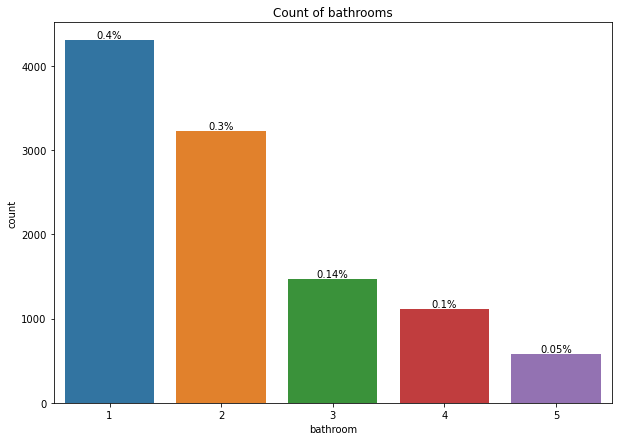

In [215]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = data["bathroom"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(data), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Count of bathrooms")                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

## Most of the houses have 1 or 2 bathrooms(about 70%)

## Column : parking spaces

In [216]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1


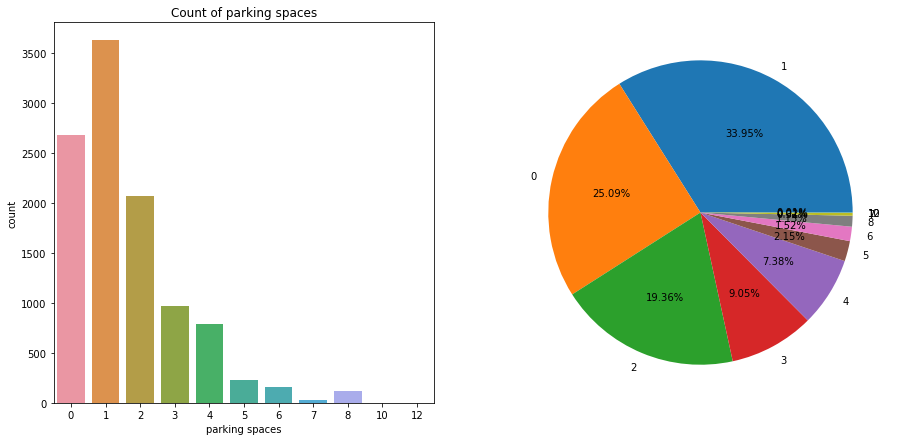

In [217]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of parking spaces")                  # Set the title of the graph
percentage = data["parking spaces"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["parking spaces"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["parking spaces"], ax = ax[0])
plt.pie(percentage, labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## As very few houses have more than 5 parking spaces, we can say that having parking spaces more than 5 might be abnormal  
So we can clean the data.

In [218]:
# We are replacing the remaning data with the mean 
mean = int(data["parking spaces"].mean())
# accessing the data higher than 5
x = data[data["parking spaces"] > 5].index
for index in x:
    data.loc[index, "parking spaces"] = mean

In [219]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [1 0 4 2 3 5]
Mode of parking spaces is 1


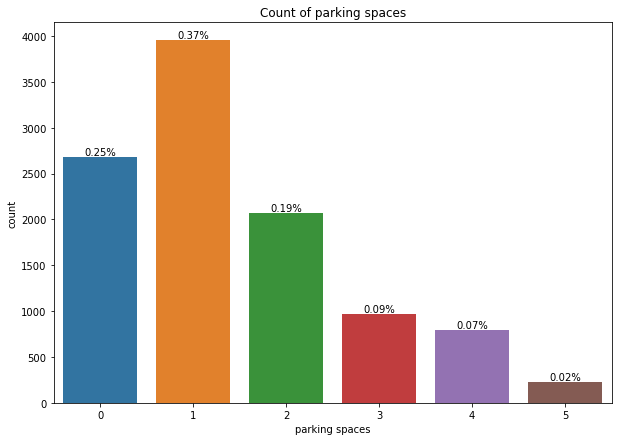

In [220]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = data["parking spaces"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(data), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Count of parking spaces")                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Most houses have 1 parking space which is about 37%, it is followed by houses with 2 parking spaces(19%)  

## 25% of the houses have no parking space

## Column : floors

In [221]:
info_of_cat("floor")

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of floor is 0


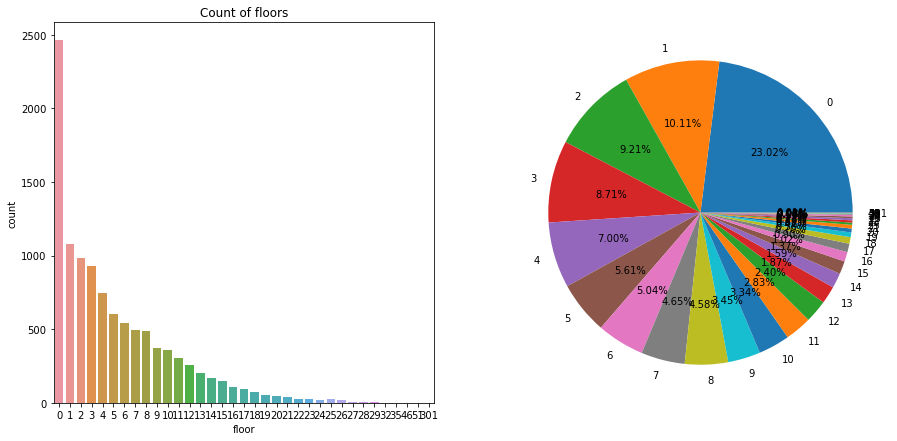

In [222]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of floors")                  # Set the title of the graph
percentage = data["floor"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["floor"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["floor"], ax = ax[0])
plt.pie(percentage, labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## There are very less number of houses with floors more than 10  
We can consider houses having more than 10 floors under apartments, So we can treat the values more than 10

In [223]:
# We are replacing floor > 10 data with the mean 
mean = int(data["floor"].mean())
# accessing the data higher than 10
x = data[data["floor"] > 10].index
for index in x:
    data.loc[index, "floor"] = mean

In [224]:
info_of_cat("floor")

Unique values in floor are: [ 7  5  6  2  1  0  4  3 10  9  8]
Mode of floor is 0


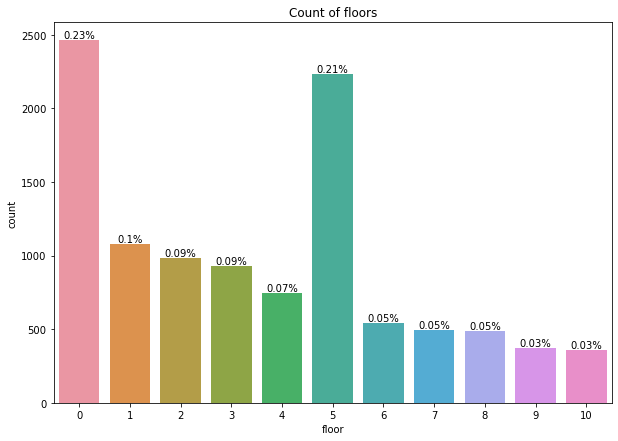

In [225]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = data["floor"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(data), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
plt.title("Count of floors")                                        # annotate: used to annotate over objects, here objects are the bars
plt.show()

## Most of the houses are only of ground floor (23%), followed by houses with 4 floors(17%)

## Column : pets

In [226]:
info_of_cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept


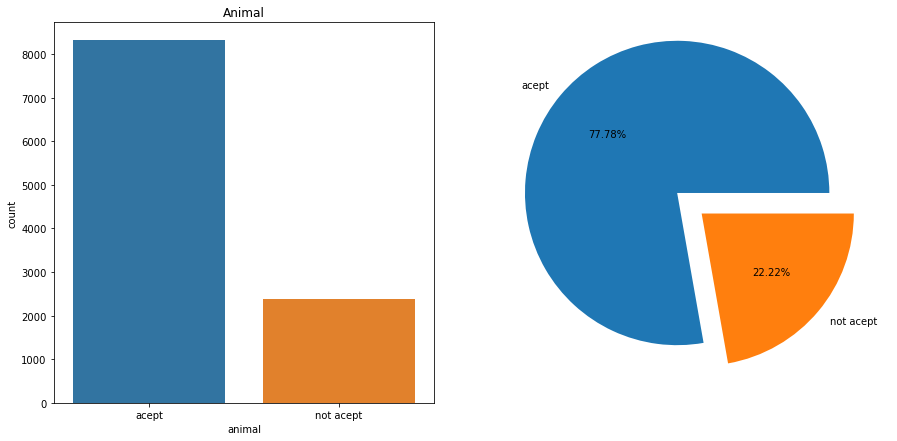

In [227]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Animal")                  # Set the title of the graph
percentage = data["animal"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["animal"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["animal"], ax = ax[0])
plt.pie(percentage, labels = labels, autopct= "%0.2f%%",explode = [0.2,0.01])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## From the graphs we can see that most of the houses allow pets (78%)

## Column : Furniture

In [228]:
info_of_cat("furniture")

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished


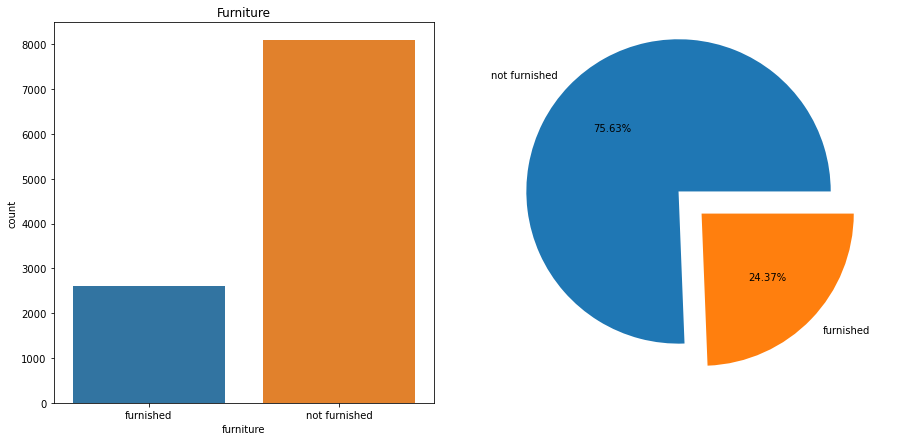

In [229]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Furniture")                  # Set the title of the graph
percentage = data["furniture"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(data["furniture"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = data["furniture"], ax = ax[0])
plt.pie(percentage, labels = labels, autopct= "%0.2f%%",explode = [0.2,0.01])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## More than 3/4th of the houses are not furnished

In [230]:
def info_of_numerical(col):                #function for continuous data
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")

## Column : Area

In [231]:
info_of_numerical("area")

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364867


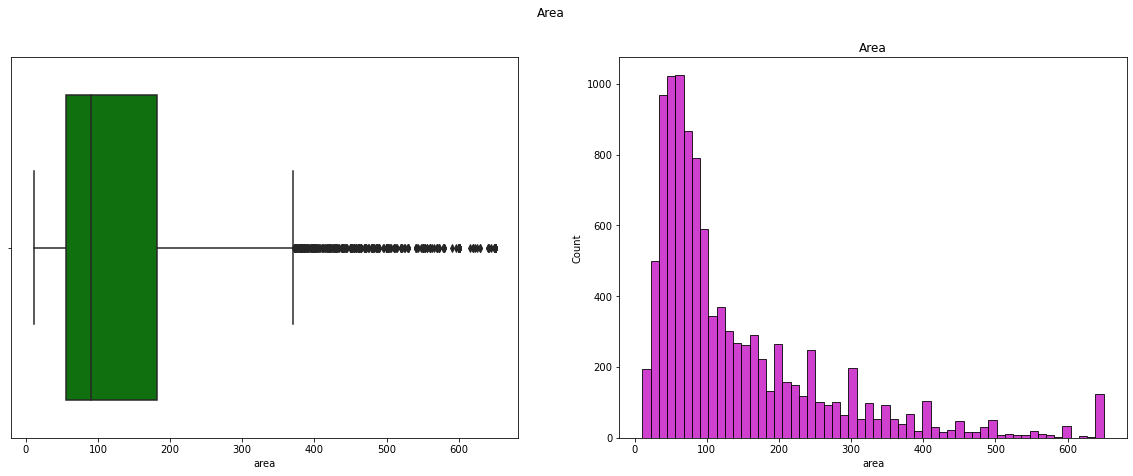

In [282]:
# Distribution of Area
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["area"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space4
plt.title("Area")
sns.boxplot(x = data["area"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("Area")
plt.show()


In [233]:
data.area.quantile(0.99)

650.0900000000001

In [234]:
#data.area=data.area.clip(data.area.quantile(0.99))

From the graphs we can see that the data has many outliers.  
So we find 99% of the data and we replace the data in above 99% data with quantile of 0.99

In [235]:
# We are replacing area > 650 data with quantile 0.99 (650) 
q = int(data.area.quantile(0.99))
# accessing the data higher than 650
x = data[data["area"] > 650].index
for index in x:
    data.loc[index, "area"] = q

In [236]:
info_of_numerical("area")

The mean of the area is 139.70155256266366
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 123.95066193365706


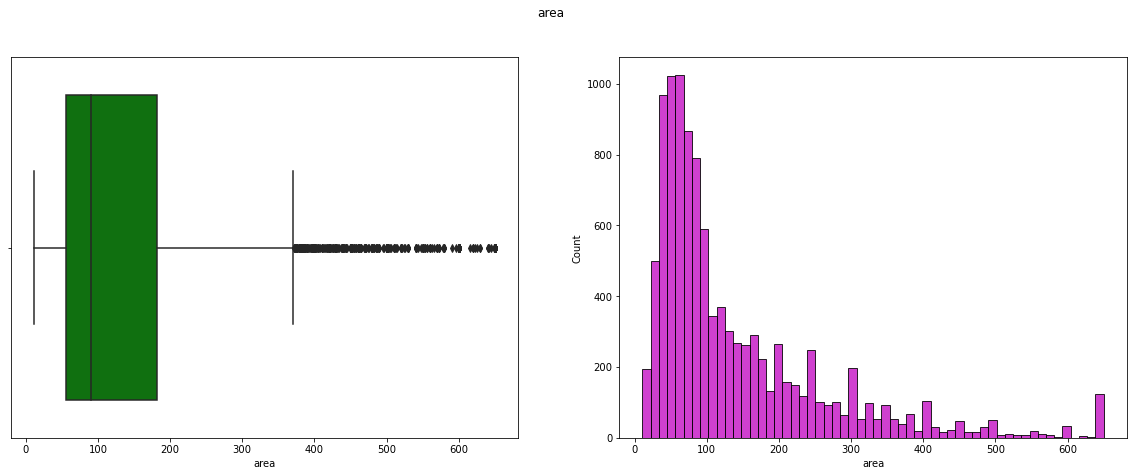

In [281]:
# Distribution of Area
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["area"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["area"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("area")
plt.show()


## Most of the houses have area in the range 50 to 200

## Column : House owner association tax

In [238]:
info_of_numerical("hoa (R$)")

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15592.305248403356


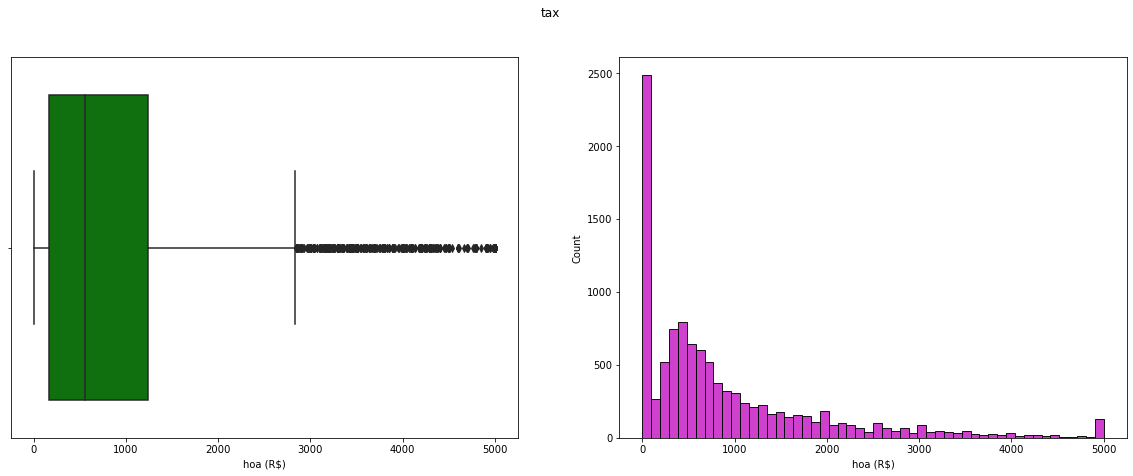

In [280]:
# Distribution of tax
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["hoa (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["hoa (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("tax")
plt.show()


From the graphs we can see that the data has many outliers.  
So we find 99% of the data and we replace the data in above 99% data with quantile of 0.99

In [240]:
# We are replacing hoa > q(0.99) data with quantile 0.99
q = int(data["hoa (R$)"].quantile(0.99))
# accessing the data higher than q(0.99)
x = data[data["hoa (R$)"] > q].index
for index in x:
    data.loc[index, "hoa (R$)"] = q

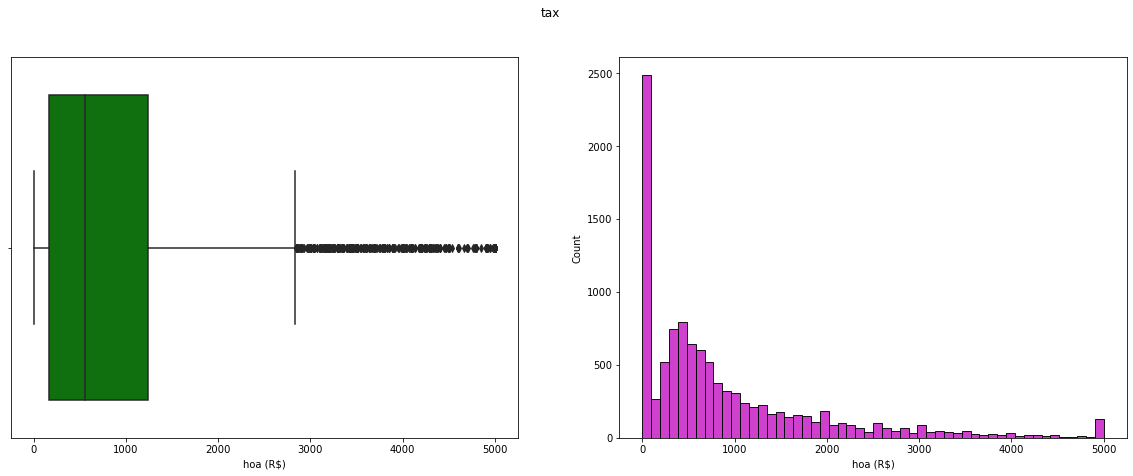

In [279]:
# Distribution of tax
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["hoa (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["hoa (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("tax")
plt.show()


## We can see from the graph that the most of the hoa is in between 100 and 1500

## Column : Rent amount

In [242]:
info_of_numerical("rent amount (R$)")

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816


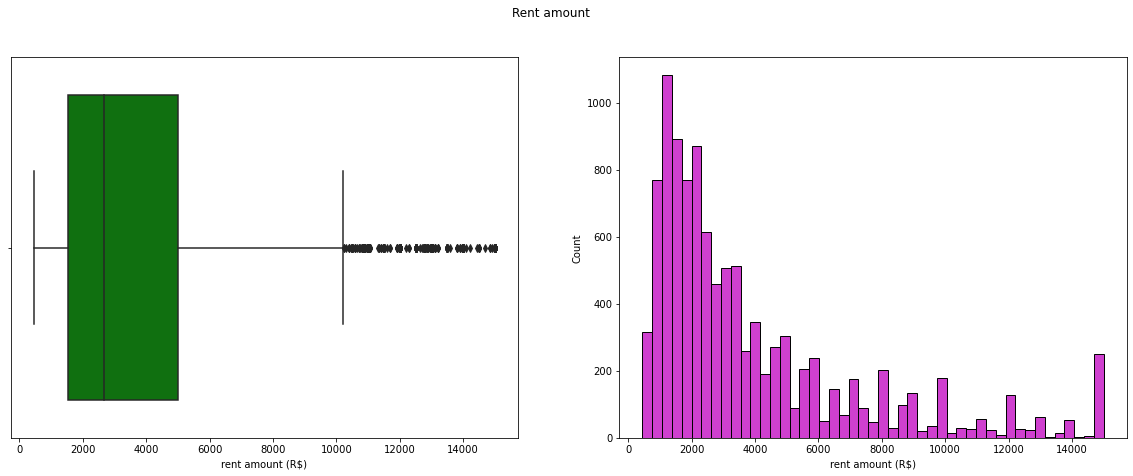

In [283]:
# Distribution of Rent amount
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["rent amount (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["rent amount (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("Rent amount")
plt.show()


From the graphs we can see that the data has many outliers.  
So we find 99% of the data and we replace the data in above 99% data with quantile of 0.99

In [244]:
# We are replacing rent amount > q(0.99) data with quantile 0.99
q = int(data["rent amount (R$)"].quantile(0.99))
# accessing the data higher than q(0.99)
x = data[data["rent amount (R$)"] > q].index
for index in x:
    data.loc[index, "rent amount (R$)"] = q

In [245]:
data["rent amount (R$)"].quantile(0.99)

15000.0

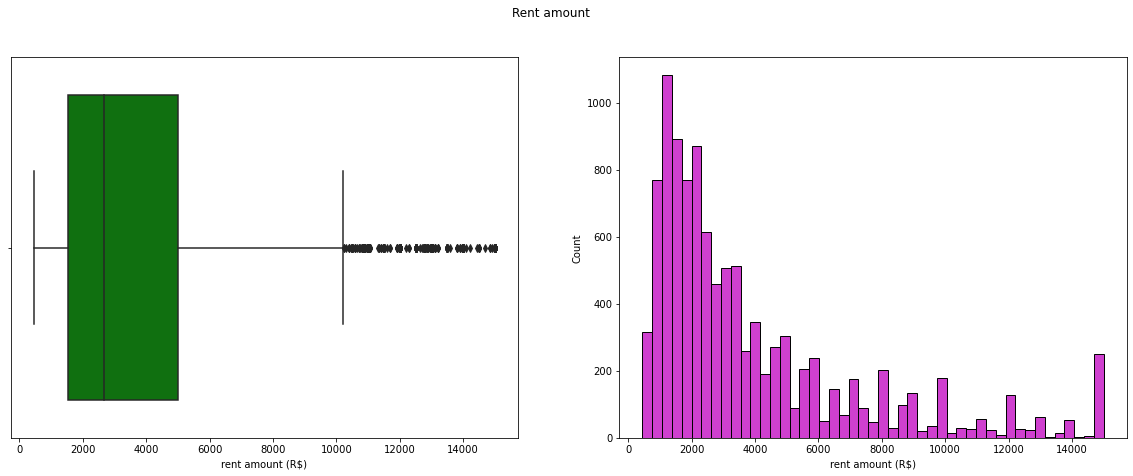

In [284]:
# Distribution of Rent amount
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["rent amount (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["rent amount (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("Rent amount")
plt.show()


## We can see that most of  the average rent amount is in the range 1800 to 5000

## Column : Property tax

In [247]:
info_of_numerical("property tax (R$)")

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161917


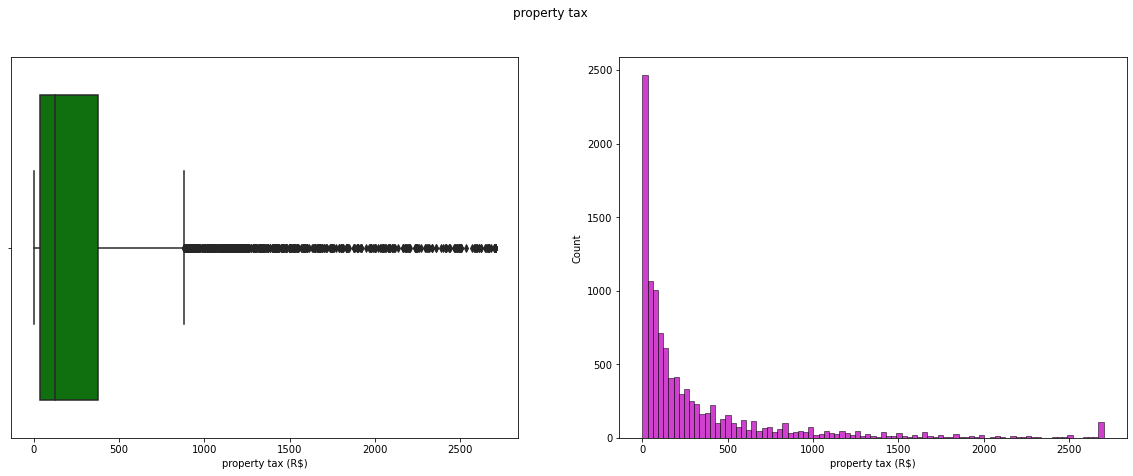

In [285]:
# Distribution of property tax
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["property tax (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["property tax (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("property tax")
plt.show()


From the graphs we can see that the data has many outliers.  
So we find 99% of the data and we replace the data in above 99% data with quantile of 0.99

In [249]:
# We are replacing property tax > q(0.99) data with quantile 0.99
q = int(data["property tax (R$)"].quantile(0.99))
# accessing the data higher than q(0.99)
x = data[data["property tax (R$)"] > q].index
for index in x:
    data.loc[index, "property tax (R$)"] = q

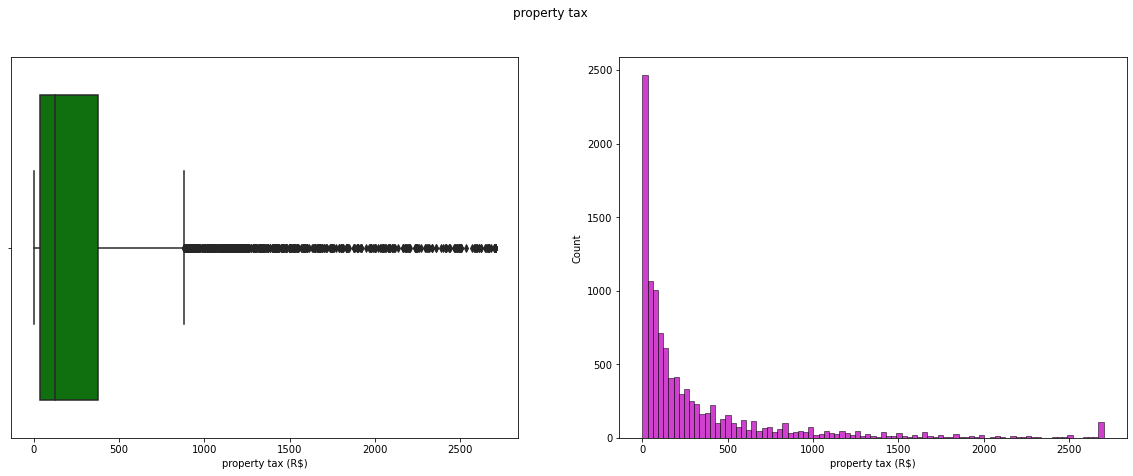

In [286]:
# Distribution of property tax
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["property tax (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["property tax (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("property tax")

plt.show()


## Most of the average property tax is in range of 0 to 400

## This is right skewed data but the strength of outliers is increasing at the end of the tail which indicates that outliers are not a human error 

## Column : Fire insurance

In [251]:
info_of_numerical("fire insurance (R$)")

The mean of the fire insurance (R$) is 53.300879161990274
The median of the fire insurance (R$) is 36.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 47.768030930197206


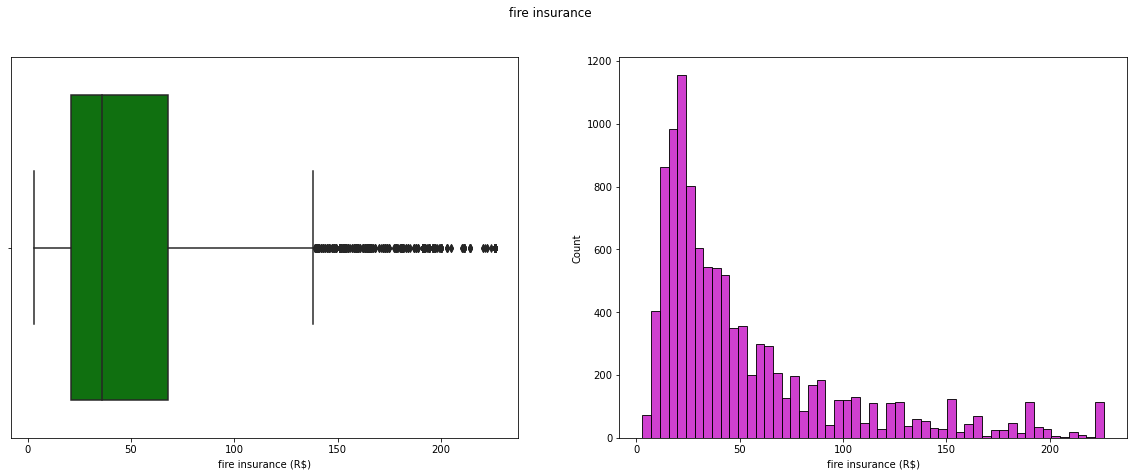

In [287]:
# Distribution of fire insurance
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["fire insurance (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["fire insurance (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("fire insurance")

plt.show()


From the graphs we can see that the data has many outliers.  
So we find 99% of the data and we replace the data in above 99% data with quantile of 0.99

In [253]:
# We are replacing fire insurance > q(0.99) data with quantile 0.99
q = int(data["fire insurance (R$)"].quantile(0.99))
# accessing the data higher than q(0.99)
x = data[data["fire insurance (R$)"] > q].index
for index in x:
    data.loc[index, "fire insurance (R$)"] = q

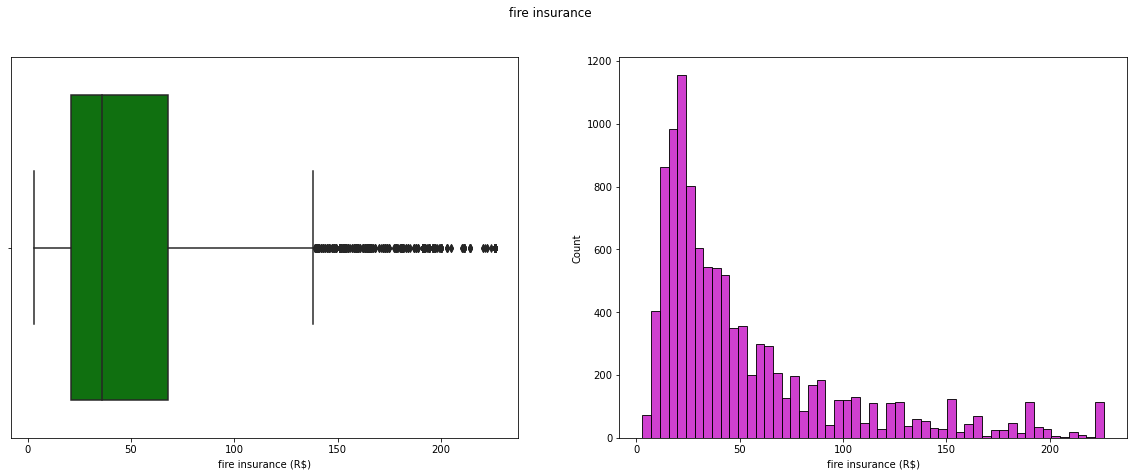

In [288]:
# Distribution of fire insurance
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["fire insurance (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["fire insurance (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("fire insurance")

plt.show()


## 75% of fire insurance is inside 75

## Column : Total cost

In [255]:
info_of_numerical("total (R$)")

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.72591235027


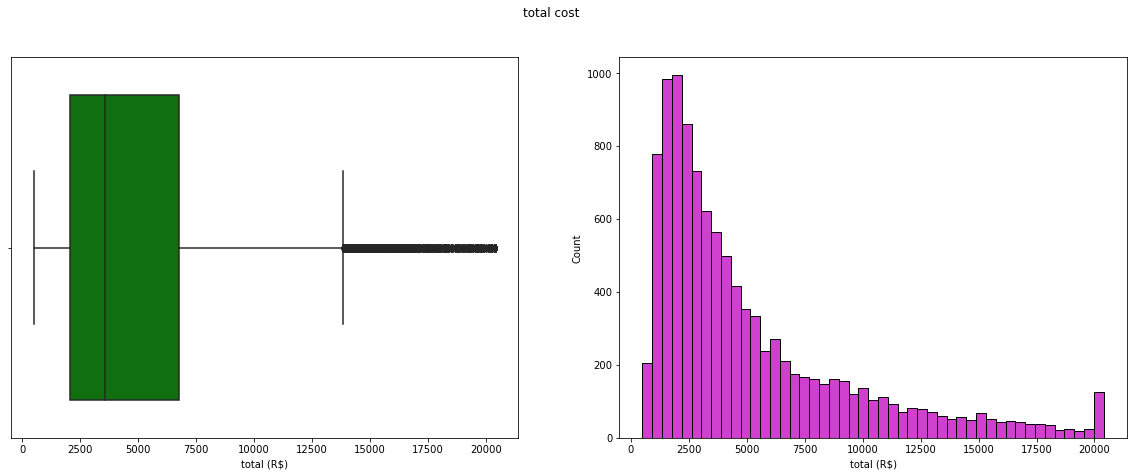

In [289]:
# Distribution of total cost
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["total (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["total (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("total cost")

plt.show()


From the graphs we can see that the data has many outliers.  
So we find 99% of the data and we replace the data in above 99% data with quantile of 0.99

In [257]:
# We are replacing total price > q(0.99) data with quantile 0.99
q = int(data["total (R$)"].quantile(0.99))
# accessing the data higher than q(0.99)
x = data[data["total (R$)"] > q].index
for index in x:
    data.loc[index, "total (R$)"] = q

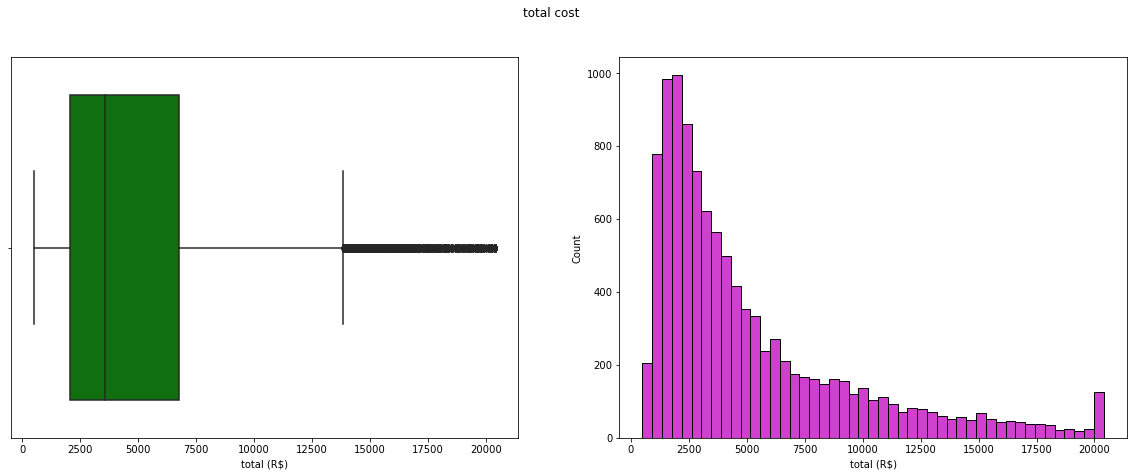

In [290]:
# Distribution of total cost
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = data["total (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = data["total (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.suptitle("total cost")

plt.show()


## The average total price is mostly in range of 2300 to 7300

## Bivarient analysis

In [259]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## Categorical to categorical

## Relationship of city with rooms

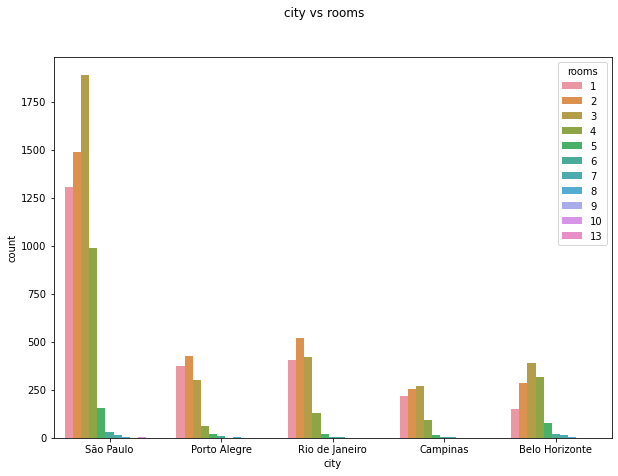

In [291]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "rooms", data = data)
plt.suptitle("city vs rooms")

plt.show()

## Here we can see that all the cities have most of the houses with either 2 or 3 rooms
## In Belo we can see that 3 room houses are more than 2 room houses


## Relationship between city and animals

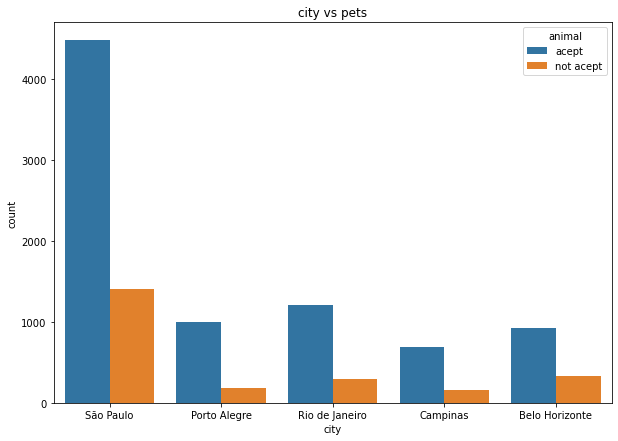

In [292]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "animal", data = data)
plt.title("city vs pets")
plt.show()

## Most of the houses accept pets across all the cities

## Relationship of city with bathrooms

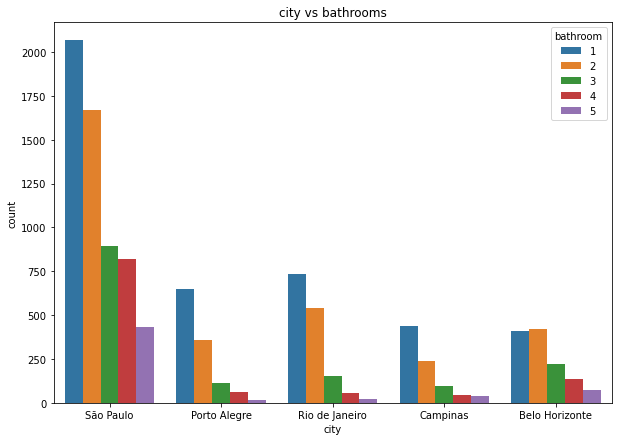

In [293]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "bathroom", data = data)
plt.title("city vs bathrooms")
plt.show()

## From the graph we can see that most houses have 1 or 2 bathrooms
## Belo has almost same number of houses with 1 or 2 bathrooms where as others have 1 greater than 2

## Relationshit of city with parking

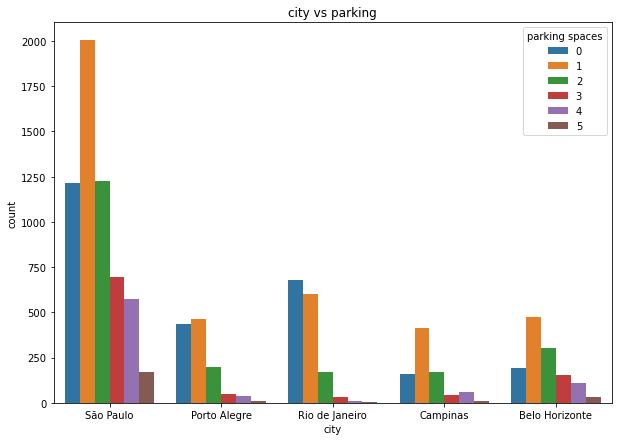

In [294]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "parking spaces", data = data)
plt.title("city vs parking")
plt.show()

## Most of the houses have no parking or 1 parking space
## Porto and Rio have almost same number of houses with 0 or 1 parking space

## Relationship of city and floors

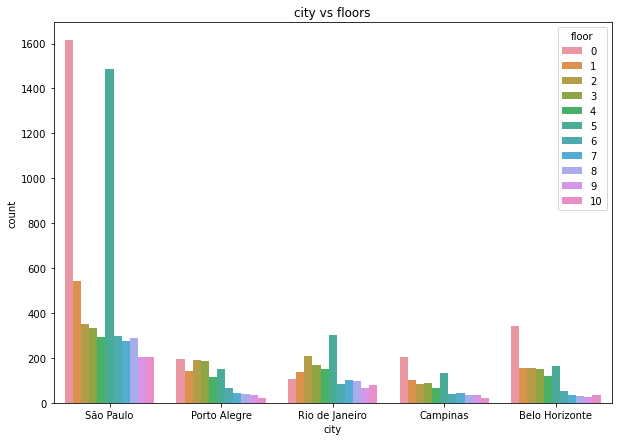

In [295]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "floor", data = data)
plt.title("city vs floors")
plt.show()

## Most of the houses are of only ground floor or 1 floor or 6 floors

## Relationship of city and furniture

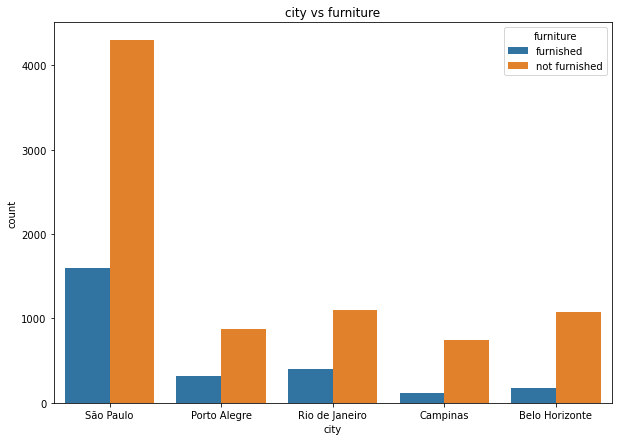

In [296]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "furniture", data = data)
plt.title("city vs furniture")
plt.show()

## Most of the houses are not furnished in all cities

## Relationship of city and area

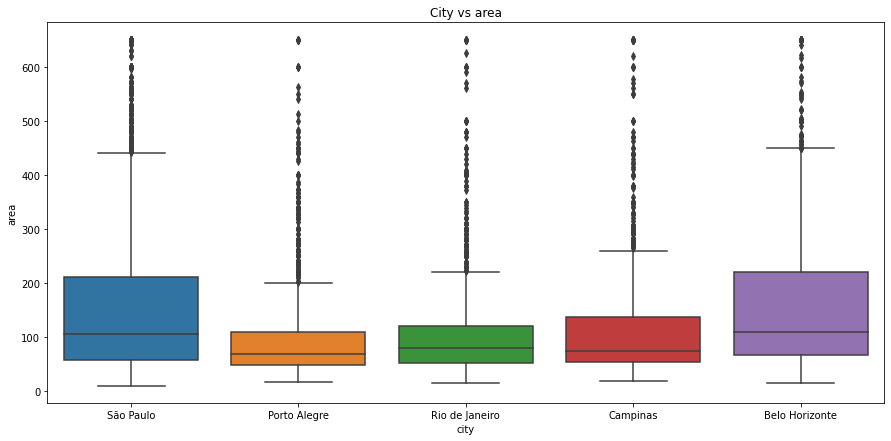

In [299]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = data["city"] ,y = data["area"])
plt.title("City vs area")
plt.show()

## The houses in Sao Paulo and Belo have almost same area where as the remaining cities have same area. Houses in Porto have the least average area

## Relationship of city and total cost

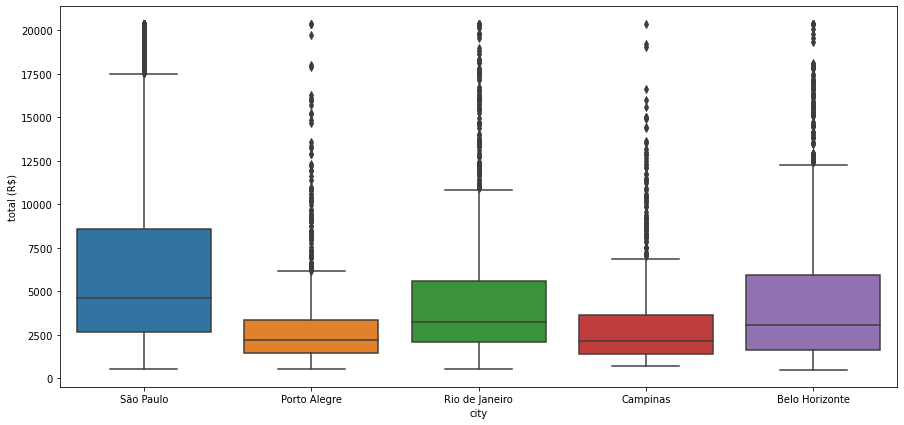

In [300]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = data["city"] ,y = data["total (R$)"])
plt.show()

## Belo has more total cost compared to Porti and Campinas

# Multivarient analysis

* Which city is best for house with 1,2,3 rooms?  
* Which city is the best city for houses with 1 or 2 bathrooms?   
* Which is the best city with one parking space?  
* Which city is best for houses with no parking spaces?  
* Which city is best for apartments?    
* Which city is preferred for furnished houses?  
* Which city is better for houses with area more than average?  
* Which city is better for small houses?   
* Which city is better for having pets?  
* Which city is better for pets , furnished and atleast 3 rooms?  
* Which city is best for big houses having more than 2 parking spaces?  
* Which city is better for big apartments?  
* Which city can be preffered for big independent houses with 2 parking spaces?  
* Which city is better for houses with no parking, one room,one bathroom?  

In [392]:
d=data[(data["city"] == "Porto Alegre") | (data["city"] =="Campinas")| (data["city"] =="Belo Horizonte")]  #filtering cities
d.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,2,1,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,5,not acept,furnished,470,2690,172,36,3368


## Which city is best for house with 1,2,3 rooms 

In [387]:
d1=d[d["rooms"] <=3 ]    #consider rooms 1,2,3

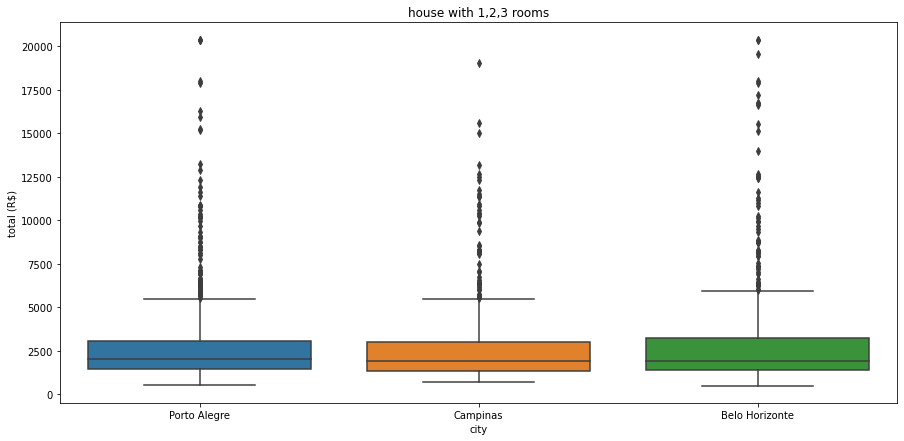

In [388]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d1["city"] ,y = d1["total (R$)"])
plt.title("house with 1,2,3 rooms")
plt.show()

## All three cities has almost same total cost for houses with 1,2,3 rooms

## Which city is the best city for houses with 1 or 2 bathrooms

In [334]:
d2=d[d["bathroom"] <3 ]    #consider houses with  1 or 2 bathrooms

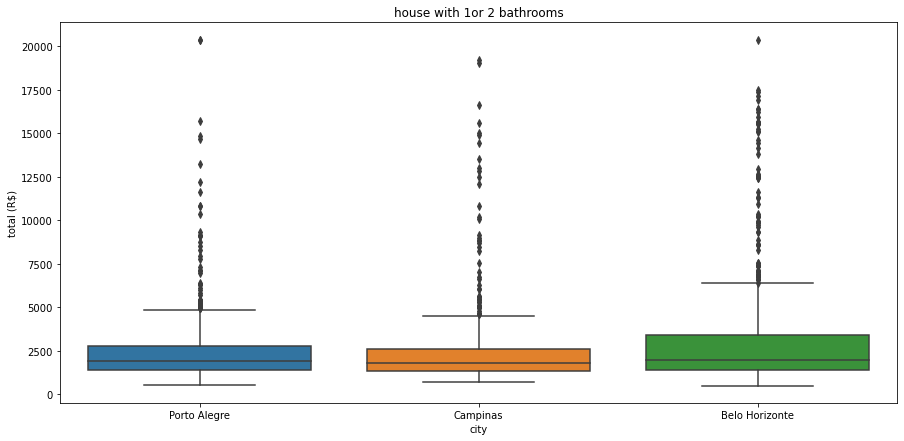

In [335]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d2["city"] ,y = d2["total (R$)"])
plt.title("house with 1or 2 bathrooms")
plt.show()

## Campinas and Porto Alegre have less total cost for houses with 1or 2  bathrooms

## Which is the best city with one parking space

In [338]:
d3=d[d["parking spaces"] ==1 ]    #consider houses with  1 parking space

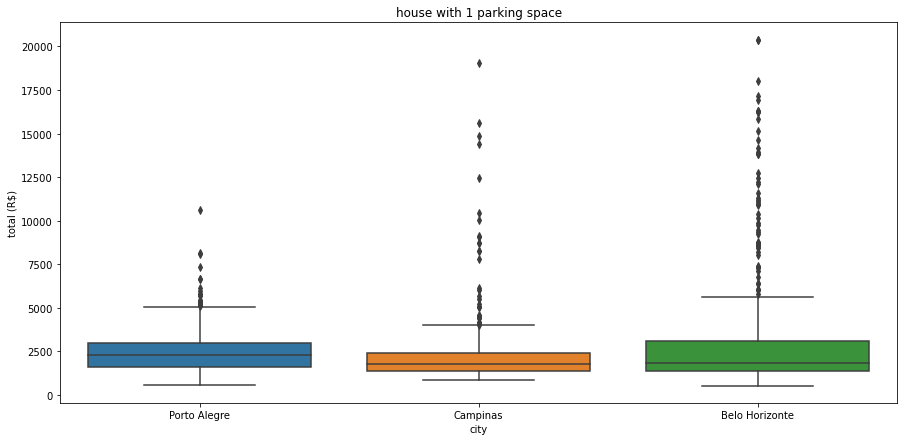

In [337]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d3["city"] ,y = d3["total (R$)"])
plt.title("house with 1 parking space")
plt.show()

## Campinas has less total cost for houses with 1 parking space

## Which city is best for houses with no parking spaces?

In [389]:
dd=d[d["parking spaces"] ==0 ]    #consider houses with  no parking space

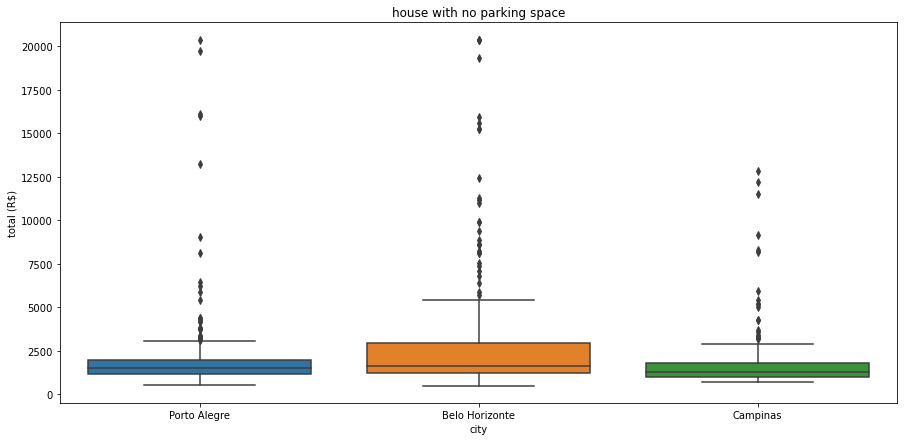

In [390]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = dd["city"] ,y = dd["total (R$)"])
plt.title("house with no parking space")
plt.show()

## Porto and Campinas have almost the same total cost for no parking space

## Which city is best for apartments? (floors>5)

In [339]:
d4=d[d["floor"] >5 ]    #consider houses with  more than 5 floors

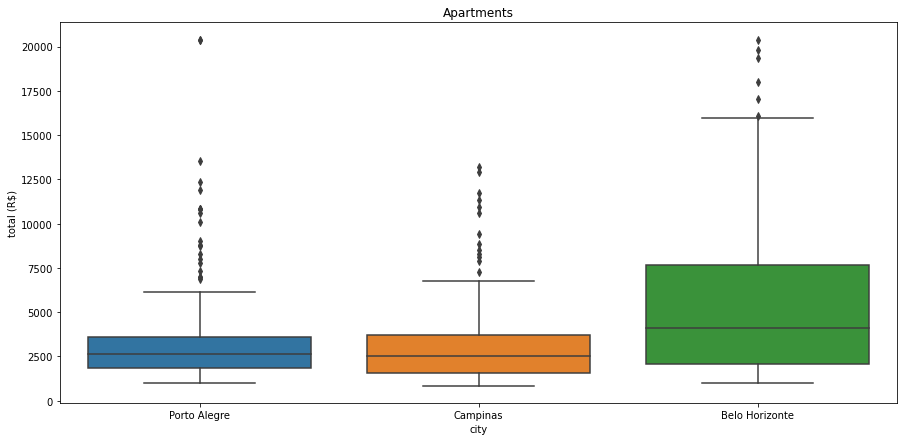

In [356]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d4["city"] ,y = d4["total (R$)"])
plt.title("Apartments")
plt.show()

## Porto and Campinas have almost the same total cost for apartments (floors>5)

## Which city is preferred for furnished houses?

In [345]:
d5=d[d["furniture"] =="furnished" ]    #consider houses with furniture

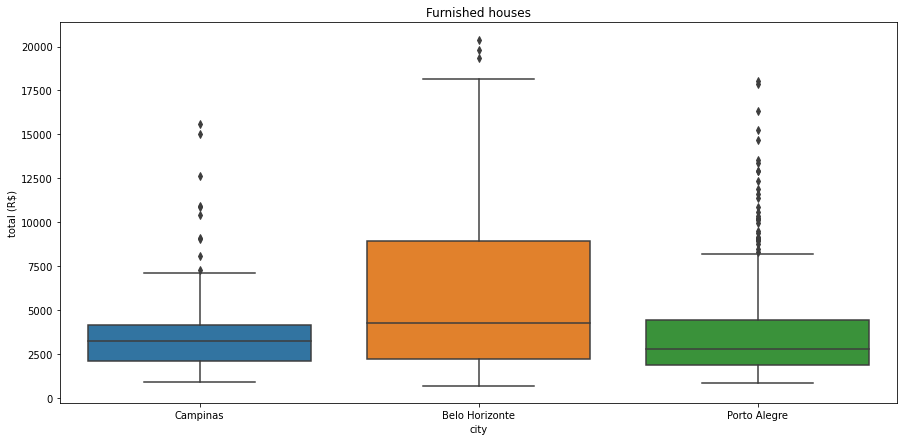

In [357]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d5["city"] ,y = d5["total (R$)"])
plt.title("Furnished houses")
plt.show()

## Porto and Campinas have almost the same total cost for houses with furniture.

## Which city is better for houses with area more than average?

In [349]:
m=d.area.mean()
m

131.9113196125908

In [351]:
d6=d[d["area"] > m ]    #consider houses with area more than average

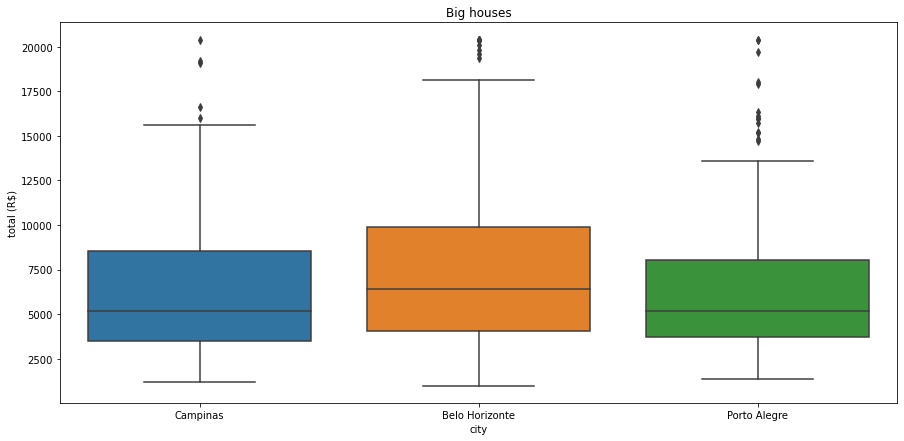

In [358]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d6["city"] ,y = d6["total (R$)"])
plt.title("Big houses")
plt.show()

## Porto has more affordable big houses

## Which city is better for small houses? (area<mean)

In [354]:
d7=d[d["area"] < m ]    #consider houses with area less than average

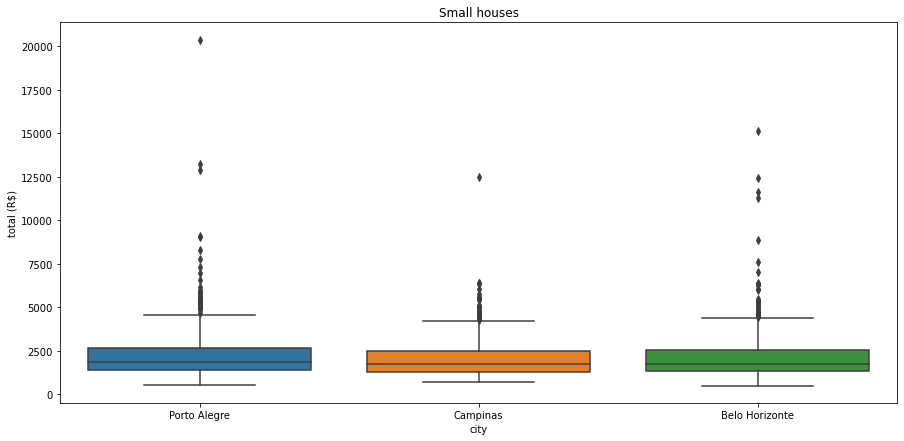

In [359]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d7["city"] ,y = d7["total (R$)"])
plt.title("Small houses")
plt.show()

## For small houses all the 3 cities have almost the same total cost

## Which city is better for having pets?

In [360]:
d8=d[d["animal"] =="acept" ]    #consider houses which accept pets

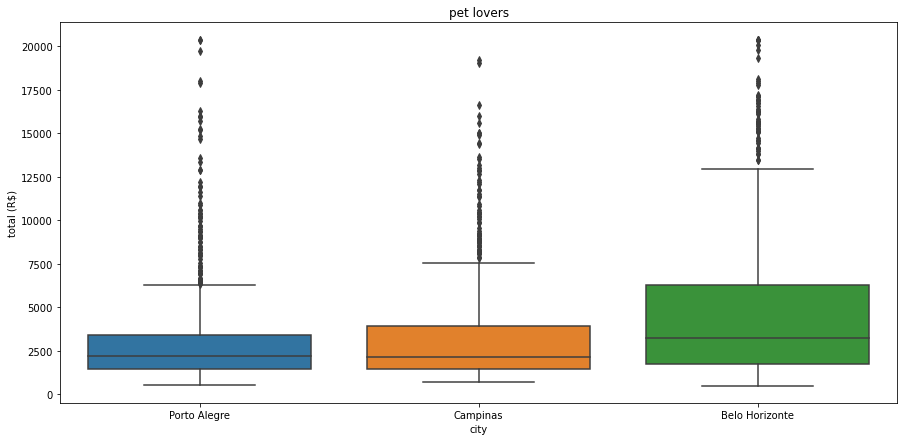

In [363]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d8["city"] ,y = d8["total (R$)"])
plt.title("pet lovers")
plt.show()

## Pet lovers can prefer to move to Porto

## Which city is better for pets , furnished and atleast 3 rooms?

In [365]:
d9=d[(d["animal"] =="acept") & (d["furniture"] =="furnished") & (d["rooms"] > 3) ] #pets accepted,furnished and room>3

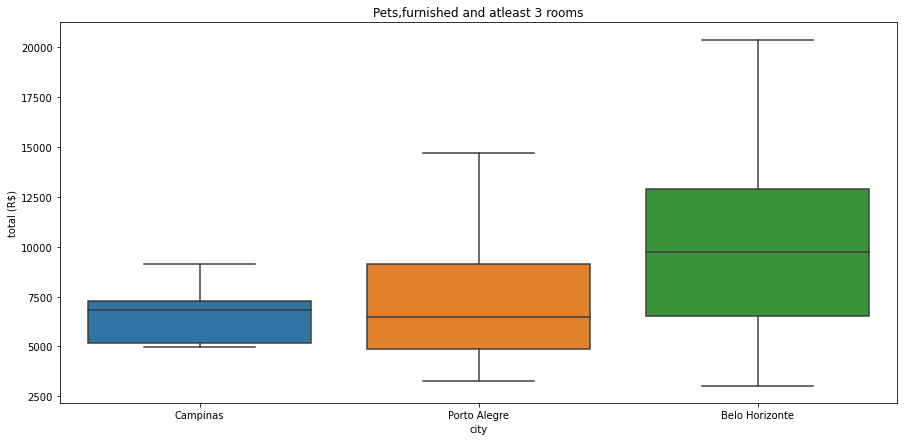

In [367]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d9["city"] ,y = d9["total (R$)"])
plt.title("Pets,furnished and atleast 3 rooms")
plt.show()

## For having pets, furnished house and atleast 3 rooms, Campinas has the least total cost

## Which city is best for big houses having more than 2 parking spaces?

In [368]:
d10=d[(d["area"] > m) & (d["parking spaces"] > 2) ]    #consider area > mean and parking spaces > 2

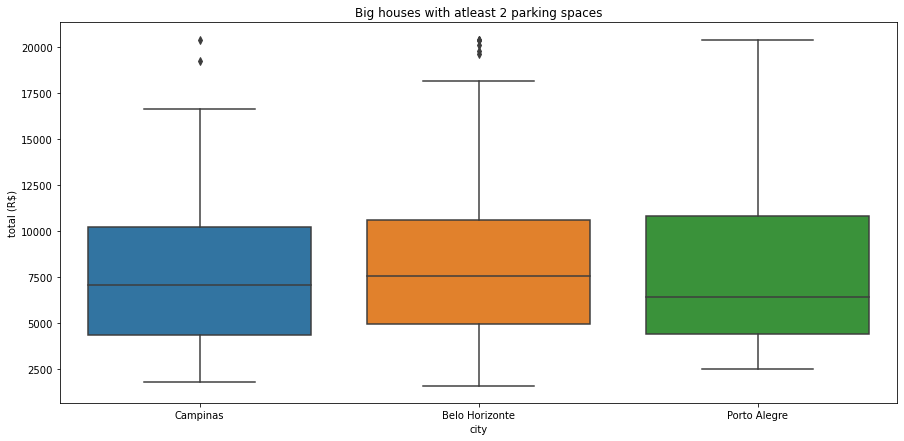

In [369]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d10["city"] ,y = d10["total (R$)"])
plt.title("Big houses with atleast 2 parking spaces")
plt.show()

## All the 3 cities have almost the same total cost for big houses with atleast 2 parking spaces

## Which city is better for big apartments? (floors> 5 and area>mean)

In [370]:
d11=d[(d["area"] > m) & (d["floor"] > 5) ]    #consider area > mean and floors > 5

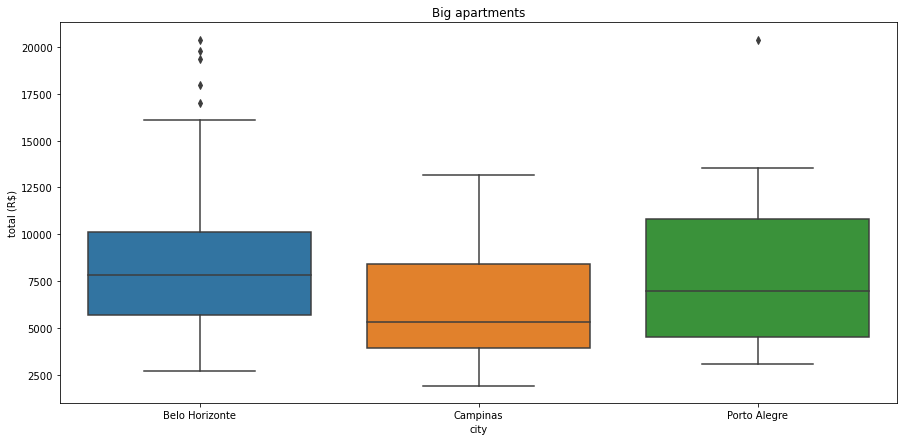

In [372]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d11["city"] ,y = d11["total (R$)"])
plt.title("Big apartments")
plt.show()

# Campinas can be preffered for big apartments

## Which city can be preffered for big independent houses with 2 parking spaces?

In [374]:
d12=d[(d["area"] > m) & (d["floor"] ==0) & (d["parking spaces"]==2)]    #consider area > mean and floors > 5

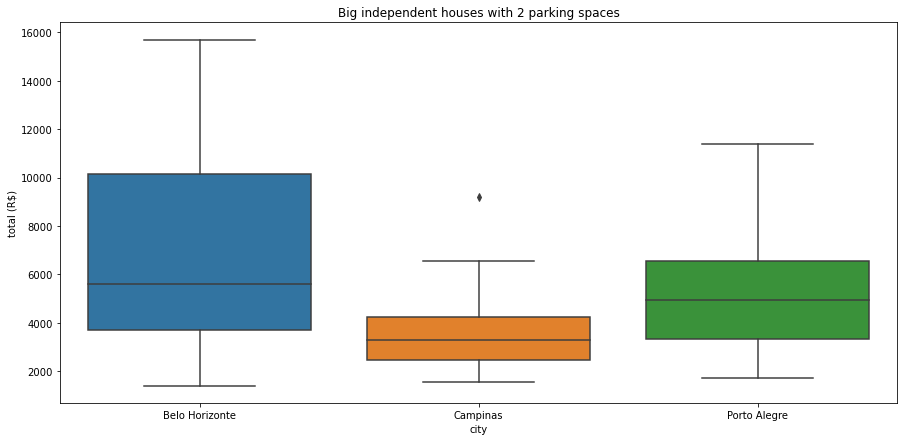

In [375]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d12["city"] ,y = d12["total (R$)"])
plt.title("Big independent houses with 2 parking spaces")
plt.show()

## For big independent houses with 2 parking spaces, Campinas is the best option

## Which city is better for houses with no parking, one room,one bathroom?

In [379]:
d13=d[(d["bathroom"] == 1) & (d["rooms"] ==1) & (d["parking spaces"]==0)]    #consider area > mean and floors > 5

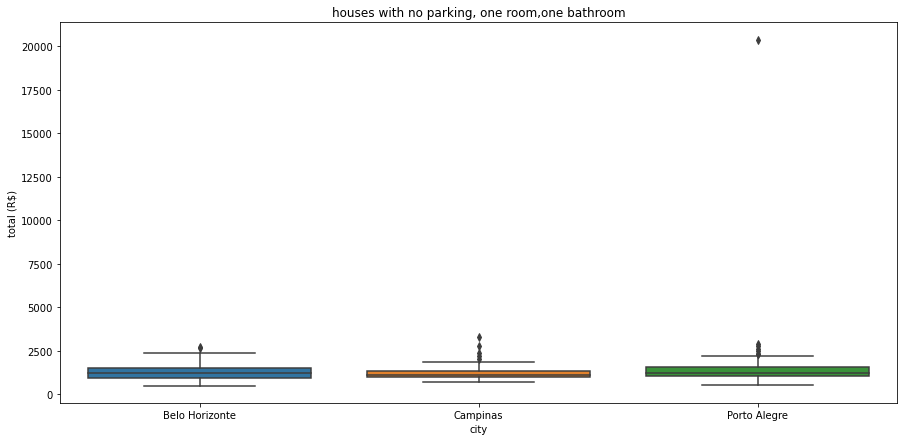

In [382]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.boxplot(x = d13["city"] ,y = d13["total (R$)"])
plt.title("houses with no parking, one room,one bathroom")
plt.show()

## All 3 cities have same total cost for houses with no parking, one room,one bathroom

There are 5 cities: São Paulo, Porto Alegre, Rio de Janeiro, Campinas and Belo Horizonte.  
People are looking to relocate from Rio and Paulo to the other 3 cities as cost of living is high 


## Conclusions:

## Insights:

* Paulo and Rio have almost 70% of the houses  
* Most of the houses have either 1,2 or 3 rooms which add upto to almost 80%  
* Most of the houses have 1 or 2 bathrooms(about 70%)  
* Most houses have 1 parking space which is about 37%, it is followed by houses with 2 parking spaces(19%)  
* Most of the houses are only of ground floor (23%)  
* Most of the houses allow pets (78%)  
* More than 3/4th of the houses are not furnished  
* Most of the houses have area in the range 50 to 200  
* Most of the hoa is in between 100 and 1500
* The average rent amount is in the range 1800 to 5000  
* Most of the average property tax is in range of 0 to 400  
* 75% of fire insurance is inside 75  
* The average total price is mostly in range of 2300 to 7300  

## Recommendations:

* Houses with less than 3 rooms: Campinas has less total cost for houses with 1,2,3 rooms  
* Houses with 1 or 2 Bathrooms: Campinas and Porto Alegre have less total cost for houses with 1 or 2 bathrooms  
* House with only 1 parking space: Campinas has less total cost for houses with 1 parking space  
* Apartments: Porto and Campinas have almost the same total cost for apartments (floors>5)  
* Furnished houses: Porto and Campinas have almost the same total cost for houses with furniture.  
* House with no parking: Porto and Campinas have almost the same total cost for no parking space  
* Big houses: Porto has more affordable big houses
* Small houses: For small houses all the 3 cities have almost the same total cost  
* Pet lovers: Pet lovers can prefer to move to Porto  
* Big houses with atleast 2 parking: All the 3 cities have almost the same total cost for big houses with atleast 2 parking spaces    
* Big apartments: Campinas can be preffered for big apartments  
* Big independent houses with 2 parking spaces: For big independent houses with 2 parking spaces, Campinas is the best option  
* 1 room,1 bathroom,no parking: All 3 cities have same total cost for houses with no parking, one room,one bathroom